# MATH123-HW5
Ethan Harvey

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Question 1
(a)

In [2]:
def rbf_kernel(x1, x2, sigma):
    return np.exp(-(np.linalg.norm(x1-x2)**2)/(2*(sigma**2)))

def construct_laplacian(data, sigma):
    n_samples, n_features = data.shape
    # compute kernel matrix
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = rbf_kernel(data[i], data[j], sigma)
    
    # compute adjacency matrix
    A = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i+1,n_samples):
            u = np.random.uniform(0,1)
            if u < K[i,j]:
                A[i,j] = 1
                A[j,i] = 1
                
    # compute degree matrix
    D = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        D[i,i] = np.sum(A[i,:])
        
    # compute graph Laplacian
    L = D - A
    
    return K, A, D, L

In [3]:
# load Moon.csv and Moon_Label.csv
data = pd.read_csv("data/Moon.csv").to_numpy()
labels = pd.read_csv("data/Moon_Label.csv").to_numpy()
# construct the Laplacian
K, A, D, L = construct_laplacian(data, 0.1)
L

array([[ 6.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  6.,  0., ...,  0., -1.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 0., -1.,  0., ...,  0.,  6.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

(b)

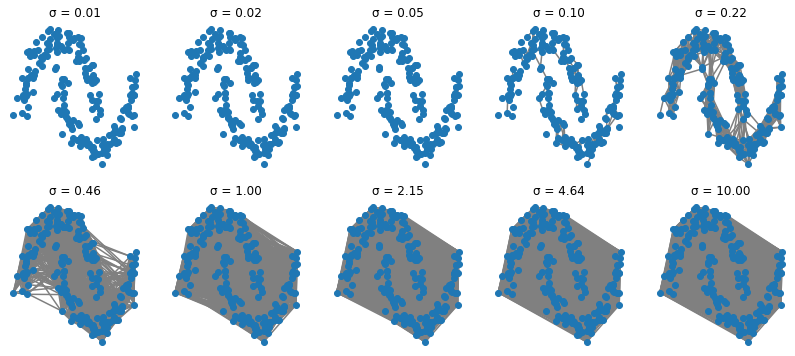

In [4]:
sigmas = np.logspace(-2,1,num=10)
# Plot graph
figure, axis = plt.subplots(2, 5, figsize=(14, 6), sharex=True, sharey=True)
for i in range(10):
    K, A, D, L = construct_laplacian(data, sigmas[i])
    for j in range(A.shape[0]):
        for k in range(j+1,A.shape[0]):
            if A[j,k] == 1:
                axis[int(i/5),i%5].plot(data[[j,k],0],data[[j,k],1], color = "grey", zorder = 0)
    axis[int(i/5),i%5].scatter(data[:,0],data[:,1])
    axis[int(i/5),i%5].axis("off")
    axis[int(i/5),i%5].set_title("\u03C3 = {:.2f}".format(sigmas[i]))
figure.show()

The graph becomes less connective as sigma approaches infinity and more connective as sigma approaches zero.

(c)

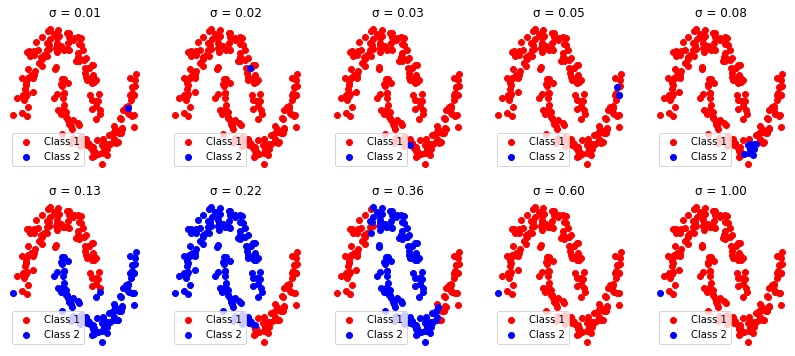

In [5]:
sigmas = np.logspace(-2,0,num=10)
# plot graph
figure, axis = plt.subplots(2, 5, figsize=(14, 6), sharex=True, sharey=True)
for i in range(10):
    K, A, D, L = construct_laplacian(data, sigmas[i])
    # compute eigen decomposition
    vals, vecs = np.linalg.eig(L)
    # sort values and vectors
    idx = vals.argsort()[::-1]  
    vals = vals[idx]
    vecs = vecs[:,idx]
    V = vecs[:,vals>1e-12][:,-2:] 
    # fit kmeans clusters
    kmeans = KMeans(n_clusters=2, n_init=10).fit(np.real(V))
    kmeans_labels = kmeans.labels_
    axis[int(i/5),i%5].scatter(data[:,0][kmeans_labels==0], data[:,1][kmeans_labels==0], c="red", label="Class 1")
    axis[int(i/5),i%5].scatter(data[:,0][kmeans_labels==1], data[:,1][kmeans_labels==1], c="blue", label="Class 2")
    axis[int(i/5),i%5].axis("off")
    axis[int(i/5),i%5].set_title("\u03C3 = {:.2f}".format(sigmas[i]))
    axis[int(i/5),i%5].legend()
figure.show()

(d)

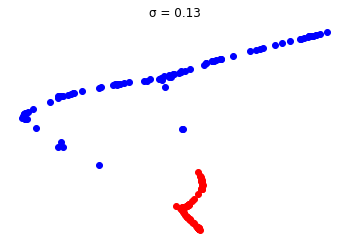

In [6]:
K, A, D, L = construct_laplacian(data, 0.13)
# compute eigen decomposition
vals, vecs = np.linalg.eig(L)
# sort values and vectors
idx = vals.argsort()[::-1]  
vals = vals[idx]
vecs = vecs[:,idx]
V = vecs[:,vals>1e-12][:,-2:]
kmeans = KMeans(n_clusters=2, n_init=10).fit(np.real(V))
kmeans_labels = kmeans.labels_
plt.scatter(V[:,0][kmeans_labels==0], V[:,1][kmeans_labels==0], c="red", label="Class 1")
plt.scatter(V[:,0][kmeans_labels==1], V[:,1][kmeans_labels==1], c="blue", label="Class 2")
plt.axis("off")
plt.title("\u03C3 = {:.2f}".format(0.13))
plt.show()

(e) My result in (c) shows that sigma affects the connectivity of the graph and therefore the clustering results.

### Question 3
(a)

In [7]:
data = pd.read_csv("data/tmdb_movies_data.csv")

(b)

In [8]:
cleaned_data = data.dropna(subset=["budget","revenue",])
cleaned_data = cleaned_data[cleaned_data["budget"] != 0]
cleaned_data = cleaned_data[cleaned_data["revenue"] != 0]
cleaned_data = cleaned_data[cleaned_data["popularity"] > 2]
cleaned_data = cleaned_data[["popularity", "budget", "revenue", "runtime", "release_year"]]
cleaned_data.head()

,popularity,budget,revenue,runtime,release_year
0,32.985763,150000000,1513528810,124,2015
1,28.419936,150000000,378436354,120,2015
2,13.112507,110000000,295238201,119,2015
3,11.173104,200000000,2068178225,136,2015
4,9.335014,190000000,1506249360,137,2015


(c)

In [9]:
cleaned_data['post_2000'] = cleaned_data["release_year"].apply(lambda x: 1 if x > 2000 else 0)
cleaned_data.head()

,popularity,budget,revenue,runtime,release_year,post_2000
0,32.985763,150000000,1513528810,124,2015,1
1,28.419936,150000000,378436354,120,2015,1
2,13.112507,110000000,295238201,119,2015,1
3,11.173104,200000000,2068178225,136,2015,1
4,9.335014,190000000,1506249360,137,2015,1


In [10]:
# test and train split
test_df = cleaned_data.sample(n=100).drop(["release_year",], axis=1)
train_df = cleaned_data[~cleaned_data.index.isin(test_df.index)].drop(["release_year",], axis=1)
# split features and labels
X_train = train_df[["popularity","budget","revenue","runtime"]].to_numpy()
X_test = test_df[["popularity","budget","revenue","runtime"]].to_numpy()
y_train = train_df[["post_2000"]].to_numpy()
y_test = test_df[["post_2000"]].to_numpy()
# standardize data
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
# run knn
predicted_correct = []
for k in [5, 10, 15, 20, 25]:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    predicted_correct.append(int(neigh.score(X_test, y_test)*100))
print(predicted_correct)

[76, 78, 75, 76, 76]


(d)

In [11]:
X = cleaned_data[["popularity","budget","runtime","release_year"]].to_numpy()
y = cleaned_data[["revenue"]].to_numpy()
# standardize data
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)
# run linear regression
reg = LinearRegression()
reg.fit(X, y)
# print coefficients
print("Standardized Coefficients:",reg.coef_[0])
print("Inverse Transformed Coefficients:",X_scaler.inverse_transform(reg.coef_[0]))

Standardized Coefficients: [ 0.24570192  0.64305935  0.06587955 -0.12986452]
Inverse Transformed Coefficients: [4.33582759e+00 1.19837701e+08 1.20354269e+02 2.00369242e+03]


Because the data has been pre-processed (e.g., standardized), the coefficients are unitless which is critical in helping us determine which features are most important. The features ranked in order of important are budget, popularity, release year, and then runtime. If we wanted to interpret the coefficients we would need to inverse transform them. Doing this would give us the change in that feature over the change in revenue.

(e)

In [12]:
X = cleaned_data[["popularity","budget","runtime","release_year"]].to_numpy()
y = cleaned_data[["revenue"]].to_numpy()
# standardize data
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)
math123 = X_scaler.transform(np.array([[4,10000000,96,2005]]))
# run knn
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X, y)
print("${:.2f}".format(y_scaler.inverse_transform(neigh.predict(math123)[0])[0]))

$185150074.00
